<a href="https://colab.research.google.com/github/vitroid/PythonTutorials/blob/master/Pending/%E9%81%8B%E5%8B%95%E6%96%B9%E7%A8%8B%E5%BC%8F%E3%81%AE%E6%95%B0%E5%80%A4%E8%A7%A3%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

最も簡単な力学系として、質量$m$の質点がバネ定数$k$のバネでつながっている一次元の系を考える。

![Spring motion](https://upload.wikimedia.org/wikipedia/commons/2/25/Animated-mass-spring.gif)

バネのポテンシャルエネルギーの式。

$$E={1\over 2}kx^2$$

これを位置$x$で微分すると力が得られる。

$$F(x)=-{\partial E\over \partial x}=-kx$$

力を質量で割ると加速度が得られ、それは位置の時間に関する二階微分である。

$$F=ma=m\ddot{x}$$

2つを合併すると二階微分方程式が得られる。

$$\ddot{x}=-{k\over m}x$$



## 解析解

この運動を、時間に関して解析的に解いてみる。二回微分して符号が逆になる関数は三角関数。
$$x(t)=A\sin \sqrt{k\over m}t$$
位置を時間で微分すると速度が得られる。
$$v(t)=\dot{x}=A\sqrt{k\over m}\cos \sqrt{k\over m}t$$

位置と速度をプロットしてみよう。


Text(0, 0.5, 'Velocity')

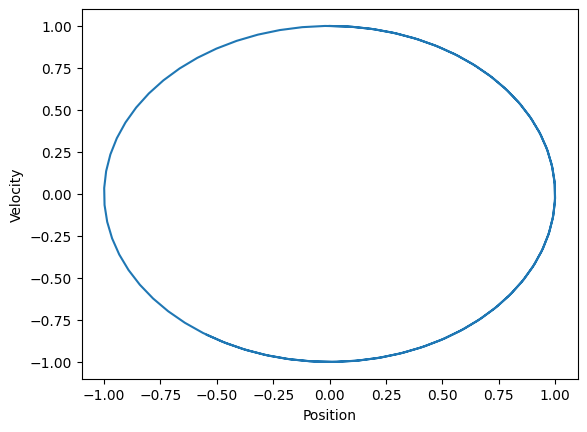

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,10,100)
k = 1
m = 1
A = 1

x = A*np.sin(np.sqrt(k/m)*t)
v = A*np.sqrt(k/m)*np.cos(np.sqrt(k/m)*t)

plt.plot(x,v)
plt.xlabel("Position")
plt.ylabel("Velocity")


## オイラー積分

もっとも素朴な積分方法。$a$を加速度、$v$を速度とする。
$$ma=F=-kx$$
を、2段階の微分にする。
$$a=\dot v$$
$$v=\dot x$$
を、それぞれ差分で近似する。
$$a(t)={v(t+\Delta d)-v(t)\over \Delta t}$$
$$v(t)={x(t+\Delta d)-x(t)\over \Delta t}$$
移項して、未来を計算する差分方程式にする。
$$F(t)=-kx(t)$$
$$v(t+\Delta t)=v(t)+a(t)\Delta t=v(t)+{F(t)\over m}\Delta t$$
$$x(t+\Delta t)=x(t)+v(t)\Delta t$$
こうして、現在の位置と速度から、すこし未来の位置と速度が計算できる。

Text(0, 0.5, 'Velocity')

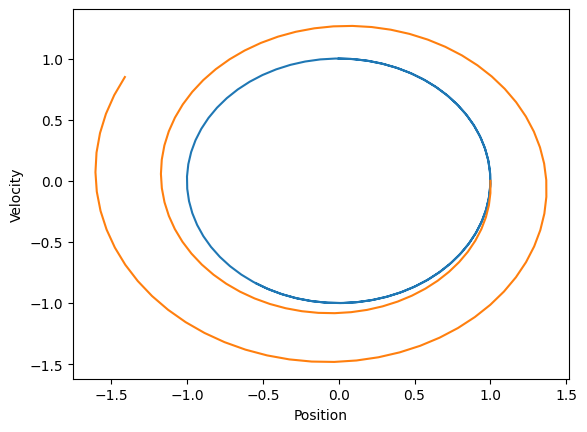

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 解析解
t = np.linspace(0,10,100)
x = A*np.sin(np.sqrt(k/m)*t)
v = A*np.sqrt(k/m)*np.cos(np.sqrt(k/m)*t)

plt.plot(x,v)

t = 0
dt = 0.1
k = 1
m = 1
A = 1

# 初期位置と初速度
x = [1.0]
v = [0.0]

for t in range(100):
    lastx, lastv = x[-1], v[-1]
    F = -k*lastx
    newv = lastv + F/m * dt
    newx = lastx + lastv * dt
    x.append(newx)
    v.append(newv)


plt.plot(x,v)
plt.xlabel("Position")
plt.ylabel("Velocity")


## 位置ヴェルレ法

教科書5.41をそのまま採用する。

$$v(t+\Delta t)=v(t) + {\Delta t\over m}F\left[x(t)+{\Delta t\over 2}v(t)\right]$$
$$x(t+\Delta t)=x(t) + {\Delta t\over 2}\left[v(t)+v(t+\Delta t)\right]$$


Text(0, 0.5, 'Velocity')

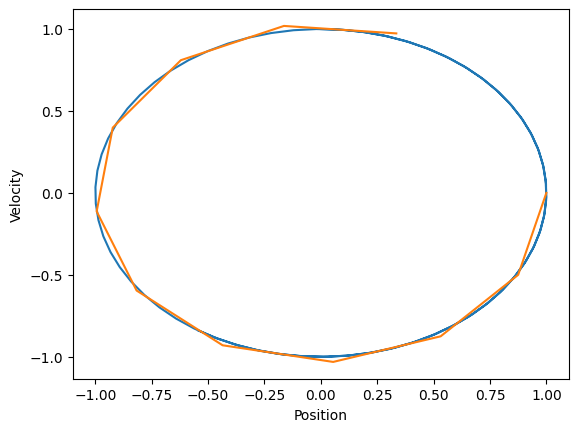

In [4]:
import numpy as np
import matplotlib.pyplot as plt


t = 0
dt = 0.5 # 0.1 for better approximation
k = 1
m = 1
A = 1

# 解析解
t = np.linspace(0,10,100)
x = A*np.sin(np.sqrt(k/m)*t)
v = A*np.sqrt(k/m)*np.cos(np.sqrt(k/m)*t)

plt.plot(x,v)

# 初期位置と初速度
x = [1.0]
v = [0.0]

for t in range(10):
    lastx, lastv = x[-1], v[-1]
    xh = lastx + lastv*dt/2
    F = -k*xh
    newv = lastv + F/m * dt
    newx = lastx + dt*(lastv+newv)/2
    x.append(newx)
    v.append(newv)


plt.plot(x,v)
plt.xlabel("Position")
plt.ylabel("Velocity")


ほかの積分は各自で書いてみて下さい。